**Dataset name:** Car Sales (https://www.kaggle.com/energykingdom/saudi-arabia-car-prices-machine-learning)

**Group number:** 3

**Group members:**

Manas Gangishetti	20A2HP455

Prabhjot Kaur	20A2HP466

Aditya Saxena	20A2HP445

Agam Modi	20A2HP449

Paredhi Gupta	20A2HP434

Keshav Kothari	20A3HP631


# Load Dataset and declare libraries to be used

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Prabhjotkaur011/mlp2021/main/carscleanS.csv")
df.head()

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4


# Describe data in dataset

In [ ]:
df.describe()

,year,kilometers,price
count,560.000000,560.000000,560.000000
mean,2011.857143,120535.482143,37521.064286
std,3.892236,81305.837563,27022.610673
min,2006.000000,0.000000,2114.000000
25%,2008.000000,39999.500000,19000.000000
50%,2012.500000,149999.500000,27500.000000
75%,2014.250000,200000.000000,58375.000000
max,2019.000000,200000.000000,100000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          560 non-null    object 
 1   car_maker     560 non-null    object 
 2   model         560 non-null    object 
 3   year          560 non-null    int64  
 4   condition     560 non-null    object 
 5   kilometers    560 non-null    float64
 6   transmission  560 non-null    object 
 7   fuel          560 non-null    object 
 8   color         560 non-null    object 
 9   pay_method    560 non-null    object 
 10  price         560 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 48.2+ KB


## Feature engineering

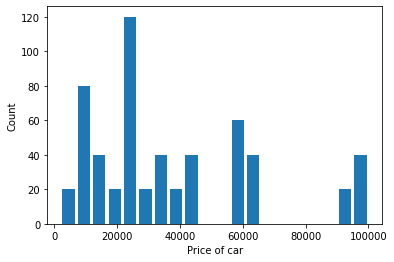

In [ ]:
plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price of car')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


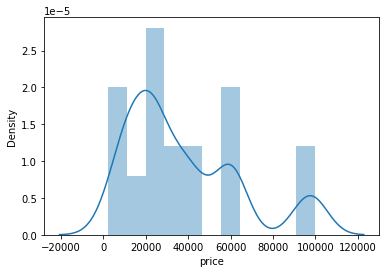

In [ ]:
sn.distplot(df['price'])

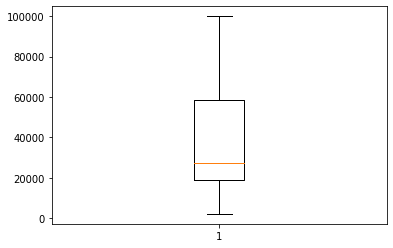

In [ ]:
box=plt.boxplot(df['price'])

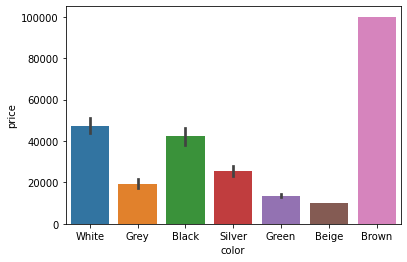

In [ ]:
sn.barplot(x='color',y=df['price'],data=df)

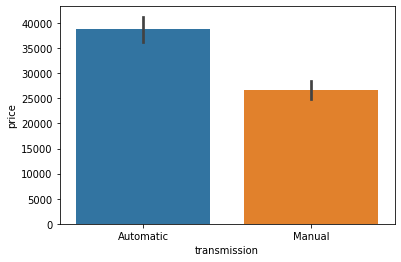

In [ ]:
sn.barplot(x='transmission',y=df['price'],data=df)

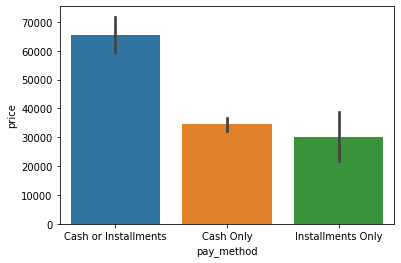

In [ ]:
sn.barplot(x='pay_method',y='price',data=df)

In [ ]:
df.dropna(axis = 1)

,city,car_maker,model,year,condition,kilometers,transmission,fuel,color,pay_method,price
0,Al Riyadh,Toyota,Rush,2019,Used,14999.5,Automatic,Gasoline,White,Cash or Installments,58375.0
1,Al Riyadh,Kia,Carnival,2006,Used,0.0,Automatic,Gasoline,Grey,Cash Only,10000.0
2,Al Riyadh,Toyota,Camry,2014,Used,24999.5,Automatic,Gasoline,White,Installments Only,58375.0
3,Al Riyadh,Ford,Fusion,2010,Used,200000.0,Automatic,Gasoline,White,Cash Only,22425.4
4,Al Riyadh,Ford,Taurus,2018,Used,5000.0,Automatic,Gasoline,Grey,Cash Only,22425.4
...,...,...,...,...,...,...,...,...,...,...,...
555,Al Riyadh,Dodge,Durango,2012,Used,200000.0,Automatic,Gasoline,Grey,Cash Only,35000.0
556,Al Riyadh,Kia,Rio,2015,Used,44999.5,Automatic,Gasoline,Beige,Cash Only,10000.0
557,Al Riyadh,BMW,730,2014,Used,114999.5,Automatic,Gasoline,Brown,Cash Only,100000.0
558,Al Riyadh,Suzuki,Other,2013,Used,14999.5,Manual,Gasoline,White,Cash Only,24000.0


In [ ]:
df.drop(columns=['city', 'car_maker', 'model', 'fuel'], axis = 1, inplace=True)

In [ ]:
df

,year,condition,kilometers,transmission,color,pay_method,price
0,2019,Used,14999.5,Automatic,White,Cash or Installments,58375.0
1,2006,Used,0.0,Automatic,Grey,Cash Only,10000.0
2,2014,Used,24999.5,Automatic,White,Installments Only,58375.0
3,2010,Used,200000.0,Automatic,White,Cash Only,22425.4
4,2018,Used,5000.0,Automatic,Grey,Cash Only,22425.4
...,...,...,...,...,...,...,...
555,2012,Used,200000.0,Automatic,Grey,Cash Only,35000.0
556,2015,Used,44999.5,Automatic,Beige,Cash Only,10000.0
557,2014,Used,114999.5,Automatic,Brown,Cash Only,100000.0
558,2013,Used,14999.5,Manual,White,Cash Only,24000.0


# Model Building

In [ ]:
y = df['price']

In [ ]:
X_features = ['year', 'condition', 'kilometers', 'transmission', 'color', 'pay_method']

In [ ]:
categorical_var = ['condition', 'transmission', 'color', 'pay_method']

In [ ]:
df_encoded = pd.get_dummies(df[X_features], columns = categorical_var, drop_first = True)

In [ ]:
X_features = df_encoded.columns

In [ ]:
X_features

Index(['year', 'kilometers', 'condition_Used', 'transmission_Manual',
       'color_Black', 'color_Brown', 'color_Green', 'color_Grey',
       'color_Silver', 'color_White', 'pay_method_Cash or Installments',
       'pay_method_Installments Only'],
      dtype='object')

In [ ]:
X = sm.add_constant(df_encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
model = sm.OLS(y_train, X_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Ordinary least squares
====================================================================================================
Model:                         OLS                         Adj. R-squared:                0.679     
Dependent Variable:            price                       AIC:                           8675.1360 
Date:                          2021-08-31 11:48            BIC:                           8726.7624 
No. Observations:              392                         Log-Likelihood:                -4324.6   
Df Model:                      12                          F-statistic:                   69.96     
Df Residuals:                  379                         Prob (F-statistic):            2.69e-88  
R-squared:                     0.689                       Scale:                         2.3147e+08
----------------------------------------------------------------------------------------------------
                                    Coef.       Std.Err.     t    P>|t|      [0.025        0.975]   
----------------------------------------------------------------------------------------------------
const                           -2496081.3623 553200.5406 -4.5121 0.0000 -3583808.0373 -1408354.6873
year                                1263.5257    274.0380  4.6108 0.0000      724.7004     1802.3510
kilometers                            -0.0053      0.0144 -0.3648 0.7154       -0.0336        0.0231
condition_Used                    -39686.4549   5172.9378 -7.6719 0.0000   -49857.7076   -29515.2023
transmission_Manual               -26878.9555   2952.6360 -9.1034 0.0000   -32684.5554   -21073.3557
color_Black                        43241.6489   5036.6343  8.5854 0.0000    33338.4022    53144.8956
color_Brown                        91631.2539   5928.7480 15.4554 0.0000    79973.8948   103288.6130
color_Green                         9250.1610   5193.1500  1.7812 0.0757     -960.8337    19461.1557
color_Grey                         14096.1800   4657.2003  3.0267 0.0026     4938.9926    23253.3674
color_Silver                       19473.8384   4735.0291  4.1127 0.0000    10163.6208    28784.0560
color_White                        47679.8615   4619.5487 10.3213 0.0000    38596.7063    56763.0166
pay_method_Cash or Installments    -4156.8131   3416.1120 -1.2168 0.2244   -10873.7193     2560.0930
pay_method_Installments Only      -22655.4764   3466.1536 -6.5362 0.0000   -29470.7766   -15840.1762
----------------------------------------------------------------------------------------------------
Omnibus:                         1.584                  Durbin-Watson:                     1.972    
Prob(Omnibus):                   0.453                  Jarque-Bera (JB):                  1.672    
Skew:                            0.144                  Prob(JB):                          0.434    
Kurtosis:                        2.859                  Condition No.:                     103123595
====================================================================================================
* The condition number is large (1e+08). This might indicate             strong multicollinearity or
other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors(X):
  X_matrix = X.values
  vif = [variance_inflation_factor(X_matrix, i) for i in range (X_matrix.shape[1])]
  vif_factors = pd.DataFrame()
  vif_factors['column'] = X.columns
  vif_factors['VIF'] = vif

  return vif_factors

#note: as_matrix() has been discontinued. values() is the correct function

In [ ]:
X

,const,year,kilometers,condition_Used,transmission_Manual,color_Black,color_Brown,color_Green,color_Grey,color_Silver,color_White,pay_method_Cash or Installments,pay_method_Installments Only
0,1.0,2019,14999.5,1,0,0,0,0,0,0,1,1,0
1,1.0,2006,0.0,1,0,0,0,0,1,0,0,0,0
2,1.0,2014,24999.5,1,0,0,0,0,0,0,1,0,1
3,1.0,2010,200000.0,1,0,0,0,0,0,0,1,0,0
4,1.0,2018,5000.0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,1.0,2012,200000.0,1,0,0,0,0,1,0,0,0,0
556,1.0,2015,44999.5,1,0,0,0,0,0,0,0,0,0
557,1.0,2014,114999.5,1,0,0,1,0,0,0,0,0,0
558,1.0,2013,14999.5,1,1,0,0,0,0,0,1,0,0


In [ ]:
vif_factors = get_vif_factors(X)
vif_factors

,column,VIF
0,const,544058.092230
1,year,2.018478
2,kilometers,2.399235
3,condition_Used,1.603593
4,transmission_Manual,1.449225
5,color_Black,6.322480
6,color_Brown,1.977446
7,color_Green,3.101724
8,color_Grey,4.523699
9,color_Silver,4.625746


In [ ]:
col_with_large_vif = vif_factors[vif_factors.VIF>4].column

Text(0.5, 1.0, 'Heatmap depicting correlation between features')

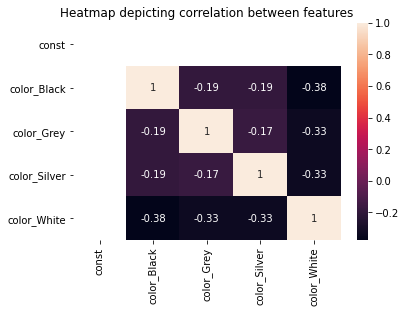

In [ ]:
sn.heatmap(X[col_with_large_vif].corr(), annot=True);
plt.title('Heatmap depicting correlation between features')

<Figure size 720x720 with 0 Axes>

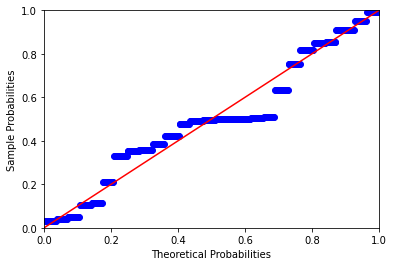

In [ ]:
#Residual: to check normality
resid = model.resid
probplot = sm.ProbPlot(resid)
plt.figure(figsize = (10,10))
probplot.ppplot(line = '45')
plt.show()

Text(0, 0.5, 'Standardised Residuals')

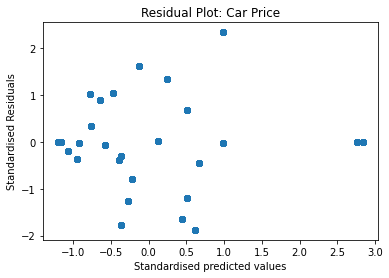

In [ ]:
#Homoskedasticity

def get_standardised_values(vals):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardised_values(model.fittedvalues), get_standardised_values(resid))
plt.xlabel("Standardised predicted values")
plt.title("Residual Plot: Car Price");
plt.ylabel('Standardised Residuals')

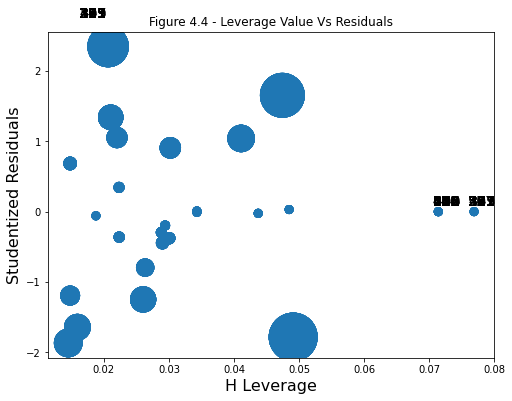

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots( figsize=(8,6) )

influence_plot(model, ax = ax )

plt.title( "Figure 4.4 - Leverage Value Vs Residuals")

plt.show();